# Markovian simulation

In [1]:
import gstlearn as gl
import gstlearn.plot as gp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Markov = True

In [3]:
dx = [1./5,1./5]
nx = [200,200]
db = gl.DbGrid.create(nx, dx)

In [4]:
import gstlearn as gl
import gstlearn.plot as gp
import numpy as np
import matplotlib.pyplot as plt

scale = 1.
sill = 2.
param=1
mesh = gl.MeshETurbo(nx,dx)

if Markov :
    model = gl.Model.createFromParam(gl.ECov.MARKOV,range=1,sill=sill,flagRange=False)
    cova = model.getCova(0)
    cova.setMarkovCoeffsBySquaredPolynoms([1,-1],[-5,1],0.001)
    coeffs = np.array(cova.getMarkovCoeffs())
    for i in range(len(coeffs)):
        coeffs[i]*= scale**(2*i)
    cova.setMarkovCoeffs(coeffs)
else :
    model = gl.Model.createFromParam(gl.ECov.BESSEL_K,param=param,range=scale,sill=sill,flagRange=False)


In [5]:
model


Model characteristics
Space dimension              = 2
Number of variable(s)        = 1
Number of basic structure(s) = 1
Number of drift function(s)  = 0
Number of drift equation(s)  = 0

Covariance Part
---------------
Markov (Third Parameter = 0)
- Sill         =      2.000
- Range        =      6.928
- Theo. Range  =      1.000
Total Sill     =        N/A

In [6]:
Q = gl.PrecisionOp(mesh,model)

In [7]:
cova = model.getCova(0)
cova.getMarkovCoeffs()

(1.001, 23.0, -9.0, 1.0)

In [8]:
cova.getCorrec()

0.04056133281650583

In [9]:
cova.getRange()

6.928203230275509

In [10]:
indx = int(nx[0]/2)
indy = int(nx[1]/2)
ind = indy + nx[1] * indx
covy = np.array(Q.evalCov(ind)).reshape(nx)

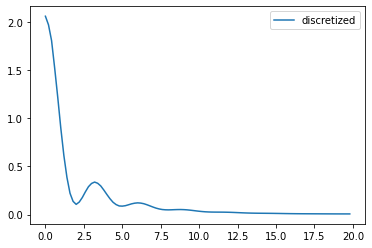

In [11]:
xx = np.arange(len(covy)/2)*dx[0]
if not Markov :
    covM = [model.eval(0,0,gl.SpacePoint([0,0]),gl.SpacePoint([0,i])) for i in xx]
    plt.plot(xx,covM,label = "Covariance")
plt.plot(xx,covy[indx,indy:(indy+nx[1])],label = "discretized")#/covy[indx,indx])
covy[indx,indx]
ax = plt.legend()

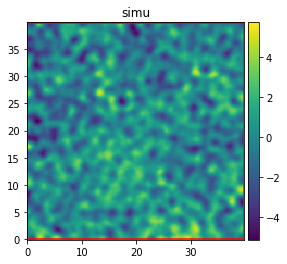

In [12]:
dbg = gl.DbGrid.create(nx,dx)
x = Q.simulate()[0]
dbg["simu"]=x
gp.plot(dbg)

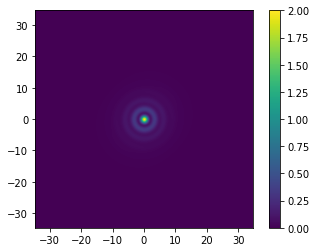

In [13]:
N = 2**8
nx1 = 5 * cova.getRange() * scale
nx2 = 5 * cova.getRange() * scale
cova = model.getCova(0)
result = np.array(cova.evalCovFFT([nx1,nx2],N).getValues())
res = np.array(result).reshape((N,N))

mH1 = nx1
mH2 = nx2

X1 = np.linspace(-mH1,mH1,N) 
X2 = np.linspace(-mH2,mH2,N) 
plt.imshow(res,extent = [-nx1,nx1,-nx2,nx2])
plt.colorbar()

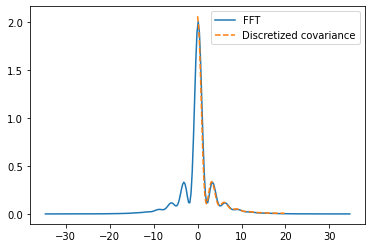

In [14]:
plt.plot(X1 , res[int(N/2),:],label="FFT")

uu = covy[indx,indy:(indy+100)]
plt.plot(np.arange(len(uu))*dx[0],uu,"--",label = "Discretized covariance")
ax = plt.legend()